In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier, GradientBoostingRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost.sklearn import XGBClassifier 
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [106]:
train = pd.read_csv('./train.csv')
test =  pd.read_csv('./test.csv')

In [107]:
data = [train, test]
df_1 = pd.concat(data)
df_1 = df_1.reset_index()
df_1 = df_1.drop(columns='index')

In [108]:
corr1 = df_1.corr()

# - Clean Data

In [109]:
df_1 = df_1.dropna(subset=['Embarked'])
df_1 = df_1.dropna(subset=['Fare'])
df_1.Embarked = df_1['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df_1.Fare = [np.intc(float(str(round(value, 5)).replace('.', ''))) for value in df_1.Fare]
df_1.Sex = [1 if i == "male" else 0 for i in df_1.Sex]

# - Cabin Columns

In [110]:
# Cria um DataFrame com todos os valores de Cabin não nulos
df_cabin = df_1[df_1.Cabin.isna() == False]
df_cabin = df_cabin.reset_index()

In [111]:
# Divide as celulas da Cabin em coordenadas
# ex A12 -> [96, 12]

def cabin_coordinate(x):
    y = (x.split(' '))
    w = []
    k = []
    z = []

    for i in y:
        for j in i:
            if(str.isalpha(j)):
                z.append(ord(j))
            else:
                w.append(int(j))
        if (w != []):
            k.append(int(str(w).replace(', ', '')[1:-1]))
        w = []
        
    if (k == []):
        k = [1]
    
    quad_x = np.ceil((np.sum(z))/ len(z))
    quad_y = np.ceil((np.sum(k))/ len(k))
    
    return (np.intc(quad_x), np.intc(quad_y))

In [112]:
# Gera um DataFrame com coordenadas
xy_coordinate = df_cabin.Cabin.apply(cabin_coordinate)
xy_coordinate = pd.DataFrame([(str(i)[1:-1].split(',')) for i in xy_coordinate])

xy_coordinate.columns = ['x', 'y']
Survived = [ 2 if np.isnan(i) else int(i) for i in df_cabin.Survived]

In [113]:
# plt.figure(figsize=(20, 15))
# sns.scatterplot(xy_coordinate.x, xy_coordinate.y, hue=Survived, s=100)

In [114]:
df_cabin = df_cabin.join(xy_coordinate)

df_cabin.x = [np.intc(i) for i in df_cabin.x]
df_cabin.y = [np.intc(i) for i in df_cabin.y]

df_cabin =df_cabin.drop(columns=['Cabin', 'index'])

### Predict Cabin Train/Test

In [115]:
y_cabin_x = df_cabin.x
x_cabin = df_cabin.drop(columns=['PassengerId', 'Survived', 'Ticket', 'x', 'Age', 'Name', 'y'])

x_train_cabin_x, x_test_cabin_x, y_train_cabin_x, y_test_cabin_x = train_test_split(x_cabin, y_cabin_x, test_size=0.3, random_state=337)

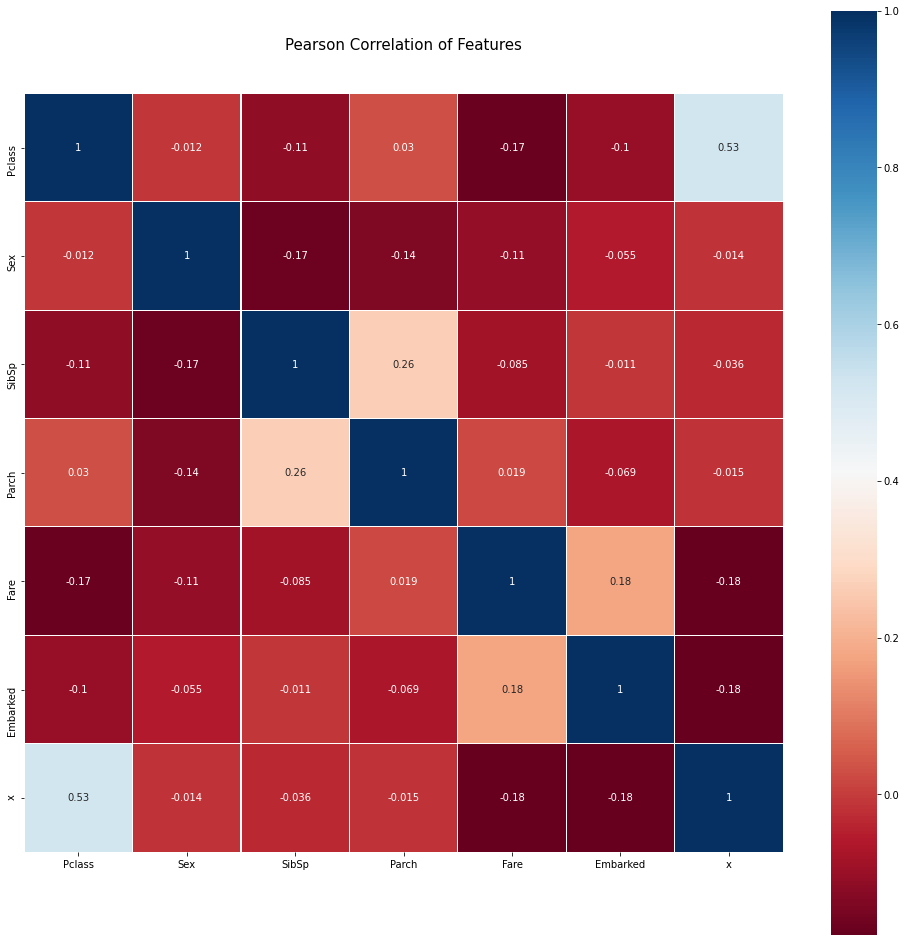

In [116]:
colormap = plt.cm.RdBu
plt.figure(figsize=(17,17))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_cabin.join(y_cabin_x).astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [147]:
clf_cabin_x = GradientBoostingClassifier()
clf_cabin_x.fit(x_train_cabin_x, y_train_cabin_x)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [148]:
y_pred_cabin_x = clf_cabin_x.predict(x_test_cabin_x)

In [149]:
accuracy_score(y_test_cabin_x, y_pred_cabin_x)

0.7727272727272727

### Predict Cabin real

In [150]:
df_test = df_1[df_1.Cabin.isna()]
df_test = df_test.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId', 'Age', 'Survived'])

In [151]:
model_cabin = clf_cabin_x.predict(df_test)
df_cabin_2 = df_1[df_1.Cabin.isna()]
df_cabin_2['x'] = model_cabin

/home/ds_magico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
df_cabin = df_cabin.iloc[:, :-1]

In [153]:
df_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,x
0,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,712833,1,67
1,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,531,0,67
2,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,518625,0,69
3,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,167,0,71
4,12,1.0,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,2655,0,67
...,...,...,...,...,...,...,...,...,...,...,...,...
288,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,17765,277208,1,68
289,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,SC/PARIS 2166,138625,1,68
290,1299,NaN,1,"Widener, Mr. George Dunton",1,50.0,1,1,113503,2115,1,67
291,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,900,2,67


In [154]:
df_2 = pd.concat([df_cabin_2, df_cabin]).sort_values(by=['PassengerId']).reset_index().drop(columns=['index', 'Cabin'])

### Train Predict Y ML

In [155]:
# y_cabin_y = df_cabin.y
# x_cabin = df_cabin.drop(columns=['PassengerId', 'Survived', 'Ticket', 'x', 'Age', 'Name', 'y'])
# x_train_cabin_y, x_test_cabin_y, y_train_cabin_y, y_test_cabin_y = train_test_split(x_cabin, y_cabin_x, test_size=0.3, random_state=337)

In [156]:
# from sklearn.ensemble import GradientBoostingRegressor
# clf_cabin_y = GradientBoostingRegressor()
# clf_cabin_y.fit(x_train_cabin_y, y_train_cabin_y)

In [157]:
# y_pred_cabin_y = pd.DataFrame(clf_cabin_y.predict(x_test_cabin_y))
# y_pred_cabin_y.columns = ['y_pred']
# y_pred_cabin_y['y_pred'] = [np.intc(i) for i in y_pred_cabin_y['y_pred']]

# y_pred_cabin_y['y_real'] = y_test_cabin_y
# y_test_cabin_y = y_test_cabin_y.reset_index()
# y_test_cabin_y = y_test_cabin_y.drop(columns='index')

# y_pred_cabin_y['accuracy'] = y_pred_cabin_y.y_pred - y_pred_cabin_y.y_real

In [158]:
# y_pred_cabin_y.accuracy.describe()

# - AGE Column

### Data cleaning AGE

In [159]:
# (df_1.Name.str.contains('Mrs'))

In [160]:
Miss = [int(y) for y in df_1[(df_1.Name.str.contains('Miss'))].Age.describe()[2:8]]
Mrs = [int(y) for y in df_1[(df_1.Name.str.contains('Mrs'))].Age.describe()[2:8]]
Mr = [int(y) for y in df_1[(df_1.Name.str.contains('Mr'))].Age.describe()[2:8]]
Master = [int(y) for y in df_1[(df_1.Name.str.contains('Master'))].Age.describe()[2:8]]
Outer = [int(y) for y in df_1[~(df_1.Name.str.contains('Miss|Mrs|Master|Mr'))].Age.describe()[2:8]]

def filterAge(title):
    describe = []
    if('Master' in title):
        describe = Master
        li_title = [1]
    elif('Mrs'  in title):
        describe = Mrs
        li_title = [5]
    elif ('Mr' in title):
        describe = Mr
        li_title = [2]
    elif('Miss' in title):
        describe = Miss
        li_title = [3]
    else :
        describe = Outer
        li_title = [4]
    return [describe, li_title]

In [161]:
age = pd.DataFrame([str(x)[1:-1][1:-1].split(',') for x in df_2.Name.apply(filterAge)])
age.columns = ['Std', 'Min', 'Per_25', 'Per_50', 'Pre_75', 'Max', 'Title']
age.Max = [i[:-1] for i in age.Max]
age.Title = [i[-1:] for i in age.Title]

In [162]:
def int_age(a):
    return([np.intc(i) for i in a])
    
age = age.apply(int_age)

In [163]:
df_3 = df_2.join(age)
df_3.Age = [ np.intc(i) if type(i) == int else i for i in df_3.Age]

In [164]:
df_3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,x,Std,Min,Per_25,Per_50,Pre_75,Max,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,725,0,71,12,11,24,30,41,80,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,712833,1,67,12,14,26,35,45,76,5
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7925,0,69,12,0,15,22,30,63,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,531,0,67,12,14,26,35,45,76,5
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,805,0,66,12,11,24,30,41,80,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,805,0,66,12,11,24,30,41,80,2
1302,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,1089,1,67,12,23,32,44,53,70,4
1303,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,725,0,71,12,11,24,30,41,80,2
1304,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,805,0,66,12,11,24,30,41,80,2


### Predict Age Train/Test

In [165]:
# Organizando modelos de treino e teste
dfAgeTrain = df_3[df_3.Age.notna()]    # DataFrame que possui idades
dfAgeTest = df_3[df_3.Age.isna()]      # DataFrame que não possui idades

# DataFrame de Treinamento
y_ageTrain = dfAgeTrain['Age']

# target
y_ageTrain = pd.Series([np.intc(value) for value in y_ageTrain])
# Data
x_ageTrain = dfAgeTrain.drop(columns=['PassengerId', 'Name', 'Age', 'Survived', 'Ticket'])

# DataFrame a ser previsto
x_ageTest = dfAgeTest.drop(columns=['PassengerId', 'Name', 'Age', 'Survived', 'Ticket'])

x_train_ageTrain, x_test_ageTrain, y_train_ageTrain, y_test_ageTrain = train_test_split(x_ageTrain, y_ageTrain, test_size=0.3, random_state=337)

In [166]:
x_train_ageTrain

,Pclass,Sex,SibSp,Parch,Fare,Embarked,x,Std,Min,Per_25,Per_50,Pre_75,Max,Title
651,3,1,0,0,84333,0,69,12,11,24,30,41,80,2
684,2,1,1,2,415792,1,65,12,11,24,30,41,80,2
1140,1,1,1,0,1367792,1,67,12,11,24,30,41,80,2
561,2,1,0,0,135,0,70,12,11,24,30,41,80,2
641,3,0,3,2,279,0,71,12,0,15,22,30,63,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,1,0,0,7775,0,69,12,11,24,30,41,80,2
558,3,0,1,0,174,0,71,12,14,26,35,45,76,5
555,1,0,1,0,396,1,65,12,14,26,35,45,76,5
87,1,0,3,2,2630,0,67,12,0,15,22,30,63,3


In [167]:
clf_age = GradientBoostingRegressor()
clf_age.fit(x_train_ageTrain, y_train_ageTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [168]:
y_pred = clf_age.predict(x_test_ageTrain)

In [169]:
y_pred = [np.intc(value) for value in np.array(y_pred)]
dic = {"Real_age": np.array(y_test_ageTrain), 
       "Pred_age": y_pred
      }

pred = pd.DataFrame(dic)

pred['Erro'] = pred['Real_age'] - pred['Pred_age']

In [170]:
# Accuracy
pred['Erro'].describe()

count    313.000000
mean       0.051118
std       11.010074
min      -30.000000
25%       -7.000000
50%       -1.000000
75%        6.000000
max       46.000000
Name: Erro, dtype: float64

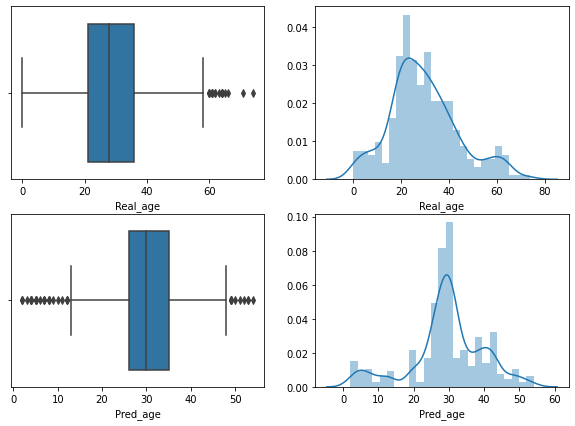

In [171]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

sns.boxplot(ax=axes[0][0], x='Real_age', data=pred)
sns.boxplot(ax=axes[1][0], x='Pred_age', data=pred)
sns.distplot(pred['Real_age'], ax=axes[0][1], bins=25)
sns.distplot(pred['Pred_age'], ax=axes[1][1], bins=25)

### Predict Age Real

In [172]:
model = clf_age.predict(x_ageTest)
model = [np.intc(x) for x in model]
dfAgeTest.Age = model

/home/ds_magico/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [582]:
df_4 = pd.concat([dfAgeTest, dfAgeTrain]).sort_values(by='PassengerId')
df_5 = df_4 

# Survived

In [583]:
# df_4['Family_size'] = [ i for i in df_4.SibSp + df_4.Parch]
# df_4['Ticket_type'] = df_4['Ticket'].apply(lambda x: x[0:3])
# df_4['Ticket_type'] = df_4['Ticket_type'].astype('category')
# df_4['Ticket_type'] = df_4['Ticket_type'].cat.codes


# sex = [[1, 0] if 1 == i else [0, 1] for i in df_4.Sex]
# sex = pd.DataFrame(sex)
# sex.columns = ['Male', 'Female']


# df_4 = df_4.join(sex)
# df_4['Names_num'] = [len(i.split()) for i in df_4.Name]
# df_4['Alone'] = [0 if i > 0 else 1 for i in df_4.SibSp + df_4.Parch]


# col Alone, max 2 
df_4['Alone'] = [0 if i < 1 else 1 if i == 1 else 2 for i in df_4.SibSp + df_4.Parch]


# col x
df_4.x = (df_4.x - 65)

In [584]:
# df_4.groupby('Alone').count().Survived.sort_values(ascending=False)

Alone
0    535
2    193
1    161
Name: Survived, dtype: int64

In [585]:
# (df_4.groupby('Alone').sum() / df_4.groupby('Alone').count() * 100).Survived.sort_values(ascending=False)

Alone
1    55.279503
2    46.632124
0    30.093458
Name: Survived, dtype: float64

In [586]:
# alterar ****

# df_4.x = [ 0 if i in [0, 1, 5] else 6 if i == 19 else i for i in df_4.x]
# df_4.x = [ 0 if i == 3 else 1 if i == 2 else 2 if i == 0 else 3 if i == 4 else 4 for i in df_4.x]

In [595]:
(df_4.groupby('x').sum().Survived / df_4.groupby('x').count().Survived * 100).sort_values(ascending=False)


x
3     62.500000
2     51.923077
0     41.666667
5     41.454545
1     38.938053
4     33.139535
6     20.394737
19     0.000000
Name: Survived, dtype: float64

In [597]:
df_4.groupby('x').count().Survived.sort_values(ascending=False)

x
5     275
4     172
6     152
1     113
2     104
3      48
0      24
19      1
Name: Survived, dtype: int64

In [588]:
df_4 = df_4.iloc[:, :12].join(df_4.iloc[:, -2:])

df_4 = df_4[~df_4.Survived.isna()].drop(columns=['Ticket', 'PassengerId', 'Name', 'Title', 'SibSp', 'Parch'])
df_4.Age = df_4.Age.astype(int) #[np.intc(i) for i in df_4.Age]
df_4.Survived = df_4.Survived.astype(int)
# df_4.Survived = [ np.intc(i) for i in df_4.Survived]

y = df_4.Survived
x = df_4.drop(columns='Survived')

In [589]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=337)

In [590]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier # 83.52
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost.sklearn import XGBClassifier 

In [591]:
clf = XGBClassifier( n_estimators= 2000,
     max_depth= 1,
     min_child_weight= 2,
     #gamma=1,
     gamma=0.9,                        
     subsample=0.78,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread= -1,
     scale_pos_weight=1)
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.9, learning_rate=0.1,
       max_delta_step=0, max_depth=1, min_child_weight=2, missing=None,
       n_estimators=2000, n_jobs=1, nthread=-1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.78)

In [592]:
y_pred = clf.predict(x_test)

In [593]:
accuracy_score(y_test, y_pred) * 100

85.76779026217228

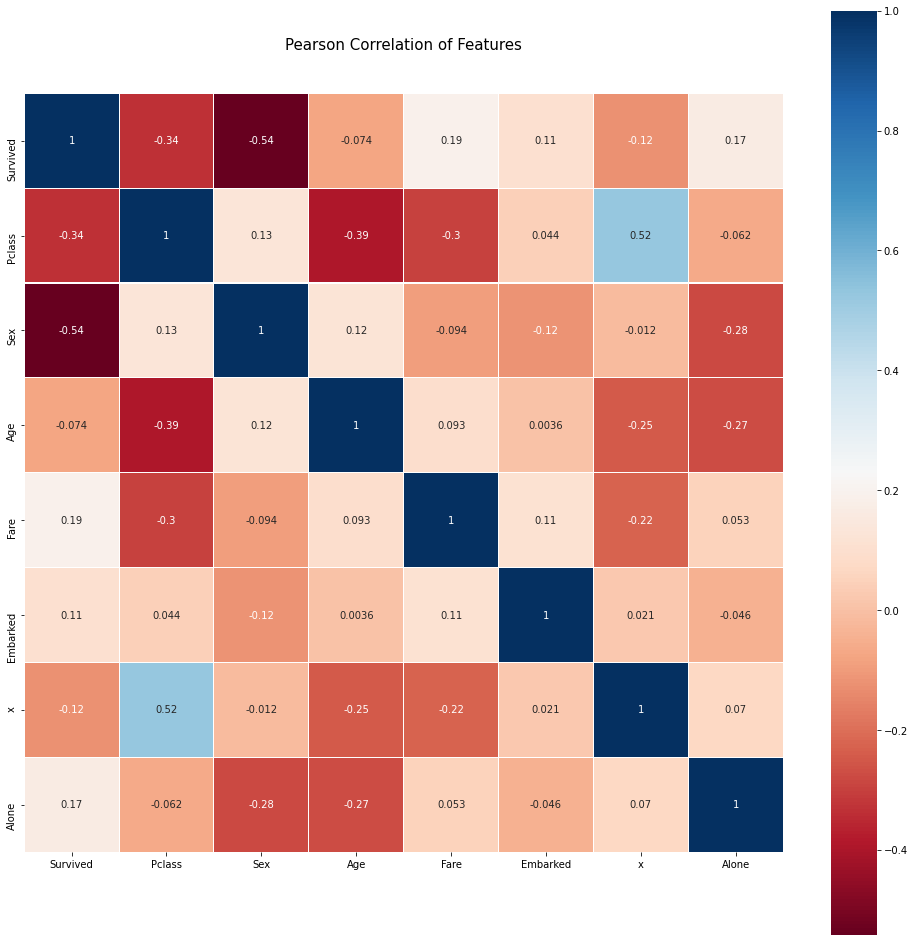

In [594]:
colormap = plt.cm.RdBu
plt.figure(figsize=(17,17))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_4.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


# Classificar Fare, Age
# Manipular Pclass